In [1]:
%%capture --no-display
import modisco
from modisco.visualization import viz_sequence
import h5py
import numpy as np

In [2]:
# Define constants and paths
task_index = 27

shap_scores_path = "/users/amtseng/tfmodisco/results/shap_scores/AI-TAC/binary_logits_task%d_shap_scores.h5" % task_index
tfm_results_path = "/users/amtseng/tfmodisco/results/tfmodisco/AI-TAC/binary_logits_task%d_tfm.h5" % task_index

[Skip to results](#results)

### Helper functions

In [3]:
def import_shap_scores(shap_scores_path):
    """
    Imports the set of SHAP scores used for the TF-MoDISco run. The SHAP scores
    are not cut down to a centered size yet.
    Arguments:
        `shap_scores_path`: path to HDF5 containing SHAP scores used to run
            TF-MoDISco, in the same order
    Returns an N x I x 4 array of hypothetical scores, and an N x I x 4 array of
    input sequences.
    """
    with h5py.File(shap_scores_path, "r") as f:
        one_hot_seqs = f["one_hot_seqs"][:]
        hyp_scores = f["hyp_scores"][:]
    
    return np.swapaxes(hyp_scores, 1, 2), np.swapaxes(one_hot_seqs, 1, 2)

In [4]:
def import_tfmodisco_results(shap_scores_path, tfm_results_path):
    """
    Imports the TF-MoDISco results object.
    Arguments:
        `shap_scores_path`: path to HDF5 containing SHAP scores used to run
            TF-MoDISco, in the same order
        `tfm_results_path`: path to HDF5 containing TF-MoDISco results
    """
    hyp_scores, one_hot_seqs = import_shap_scores(shap_scores_path)
    act_scores = hyp_scores * one_hot_seqs
    
    track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
        task_names=["task0"],
        contrib_scores={"task0": act_scores},
        hypothetical_contribs={"task0": hyp_scores},
        one_hot=one_hot_seqs
    )
    
    with h5py.File(tfm_results_path,"r") as f:
        return modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(f, track_set=track_set)

<a id="results"></a>
### Import and plot some SHAP score tracks
Plot the central region of some randomly selected actual importance scores

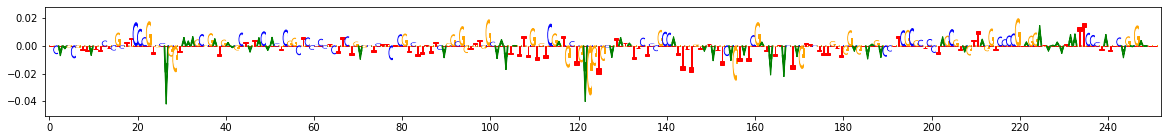

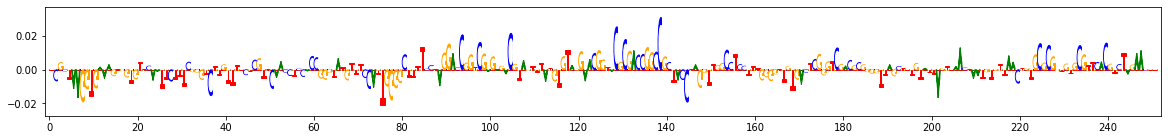

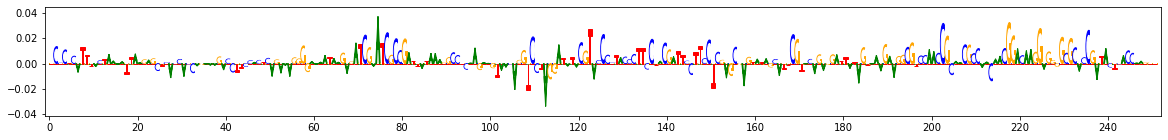

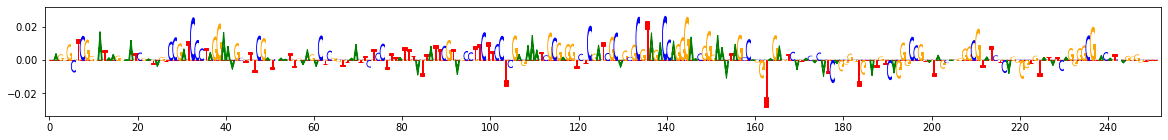

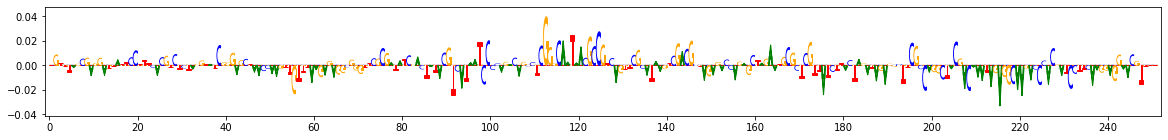

In [5]:
hyp_scores, one_hot_seqs = import_shap_scores(shap_scores_path)
for index in np.random.choice(hyp_scores.shape[0], size=5, replace=False):
    viz_sequence.plot_weights((hyp_scores[index] * one_hot_seqs[index]), subticks_frequency=20)

### Import and plot TF-MoDISco results
Plot all motifs by metacluster

In [6]:
# Import the TF-MoDISco results object
tfm_obj = import_tfmodisco_results(shap_scores_path, tfm_results_path)

Metacluster 1/2
Pattern 1/18
--------------------------------------
1713 seqlets
Sequence


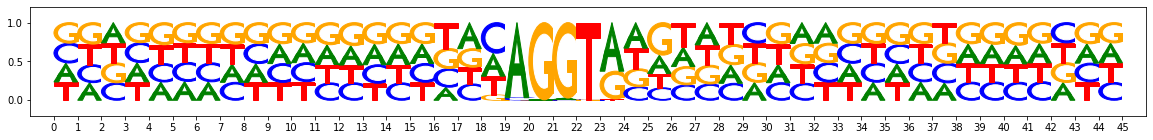

Hypothetical contributions


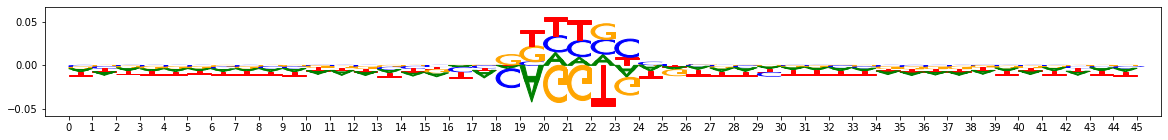

Contribution_scores


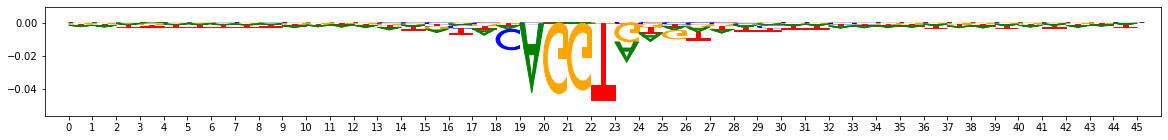

Pattern 2/18
--------------------------------------
1521 seqlets
Sequence


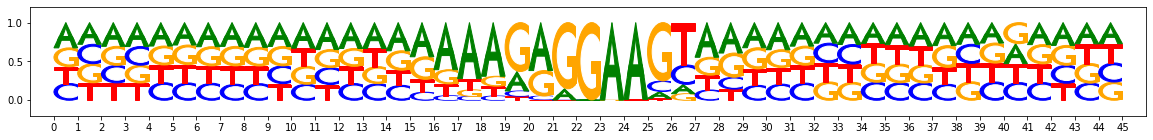

Hypothetical contributions


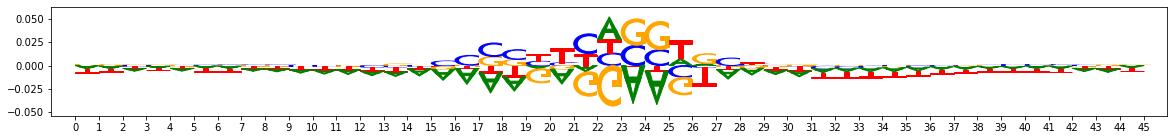

Contribution_scores


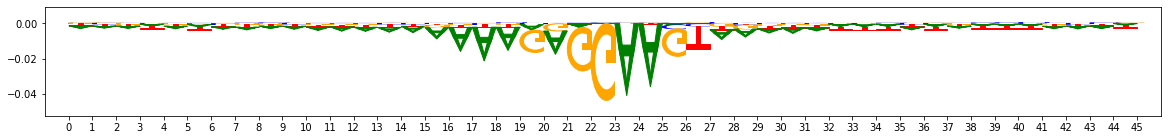

Pattern 3/18
--------------------------------------
644 seqlets
Sequence


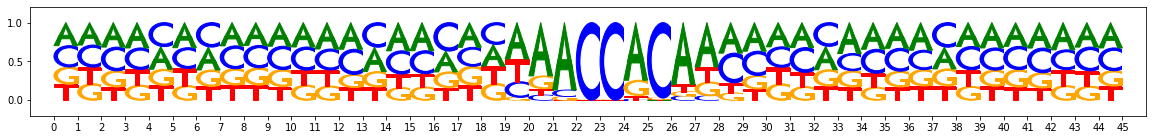

Hypothetical contributions


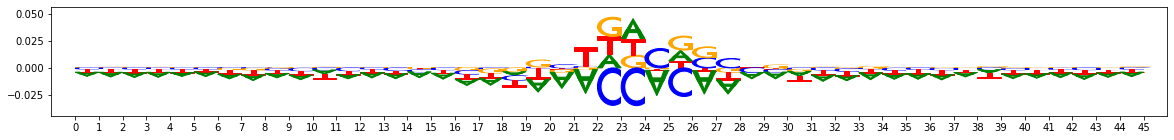

Contribution_scores


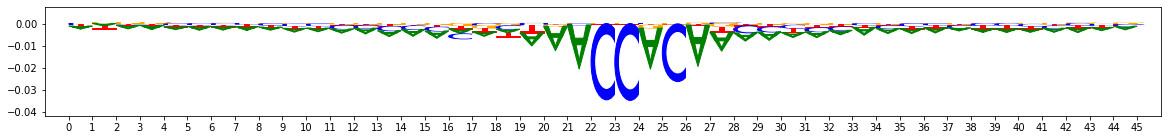

Pattern 4/18
--------------------------------------
591 seqlets
Sequence


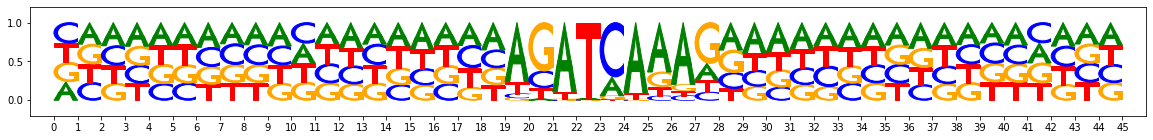

Hypothetical contributions


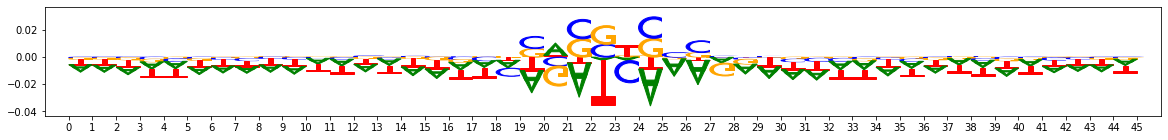

Contribution_scores


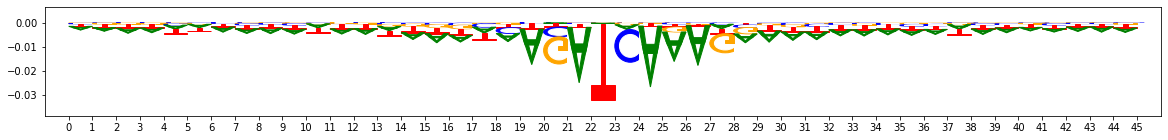

Pattern 5/18
--------------------------------------
521 seqlets
Sequence


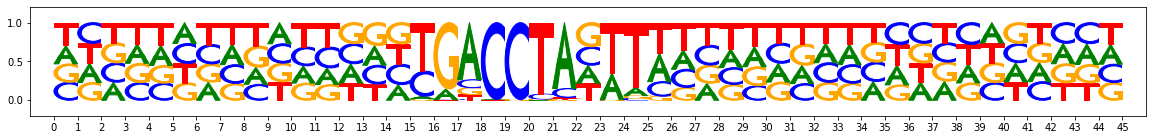

Hypothetical contributions


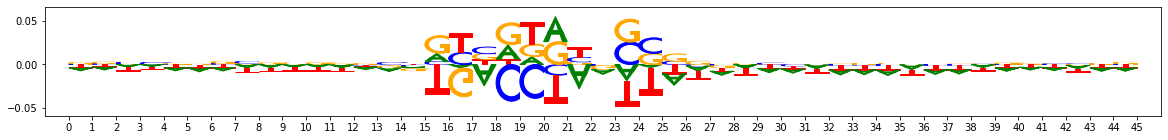

Contribution_scores


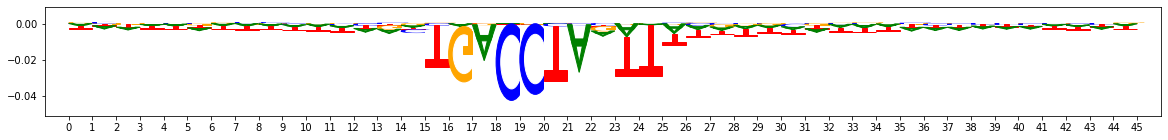

Pattern 6/18
--------------------------------------
415 seqlets
Sequence


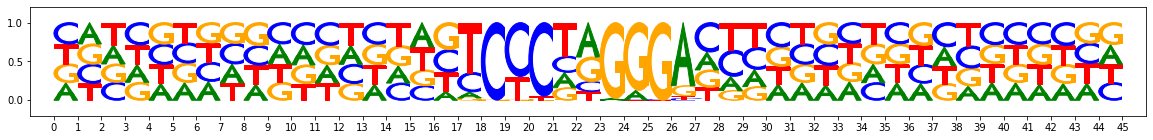

Hypothetical contributions


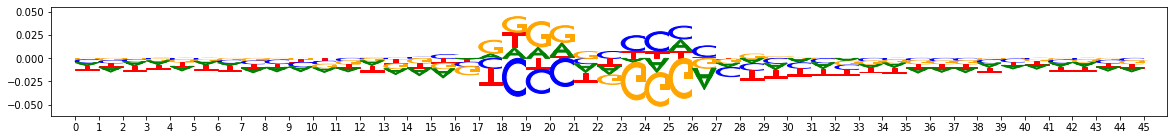

Contribution_scores


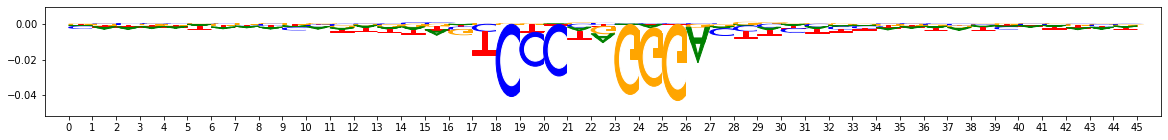

Pattern 7/18
--------------------------------------
364 seqlets
Sequence


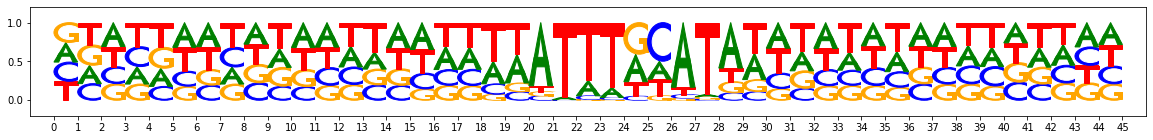

Hypothetical contributions


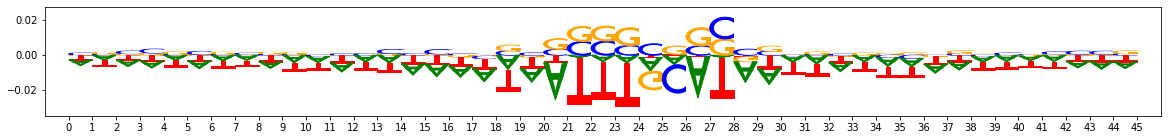

Contribution_scores


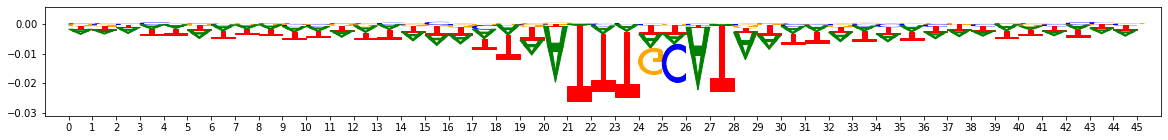

Pattern 8/18
--------------------------------------
351 seqlets
Sequence


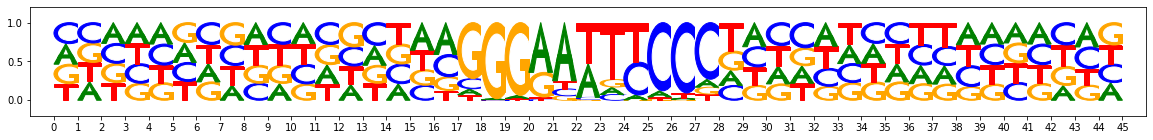

Hypothetical contributions


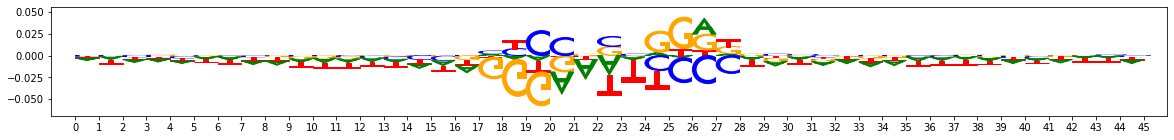

Contribution_scores


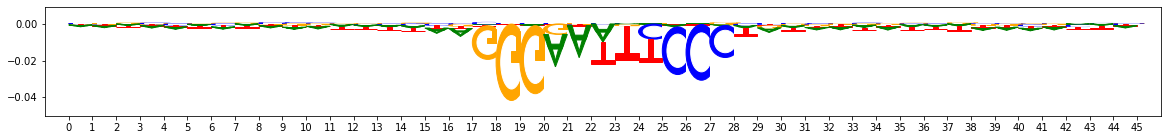

Pattern 9/18
--------------------------------------
320 seqlets
Sequence


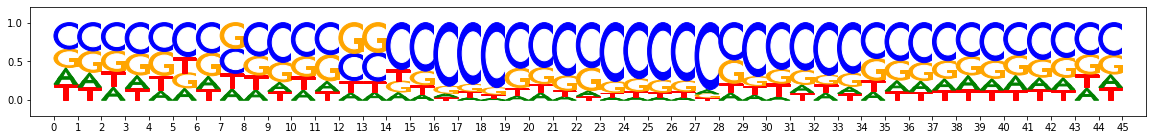

Hypothetical contributions


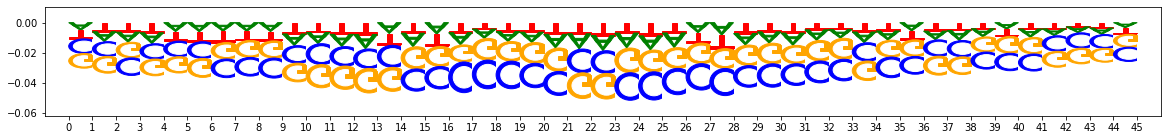

Contribution_scores


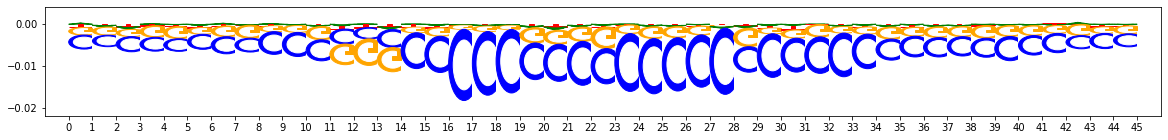

Pattern 10/18
--------------------------------------
215 seqlets
Sequence


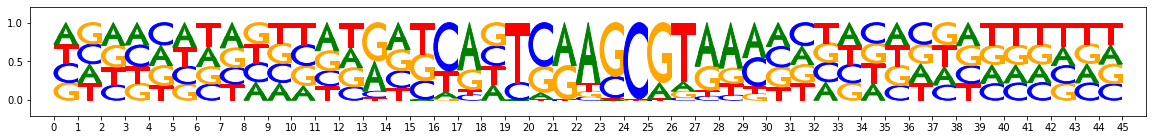

Hypothetical contributions


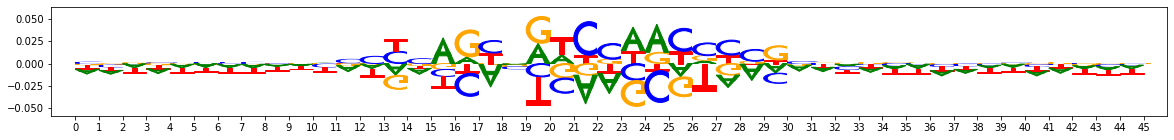

Contribution_scores


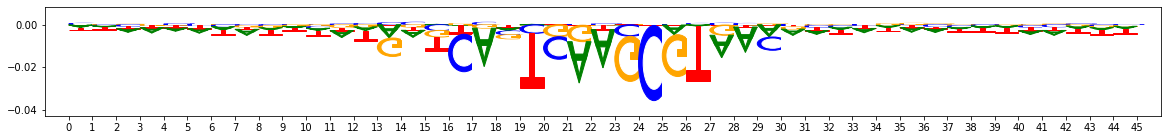

Pattern 11/18
--------------------------------------
197 seqlets
Sequence


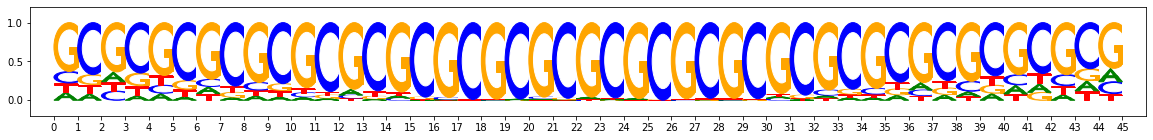

Hypothetical contributions


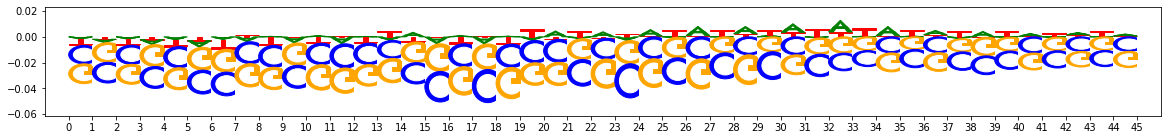

Contribution_scores


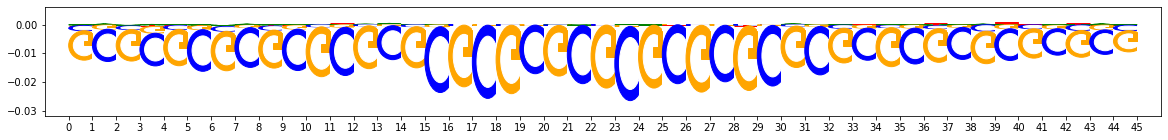

Pattern 12/18
--------------------------------------
171 seqlets
Sequence


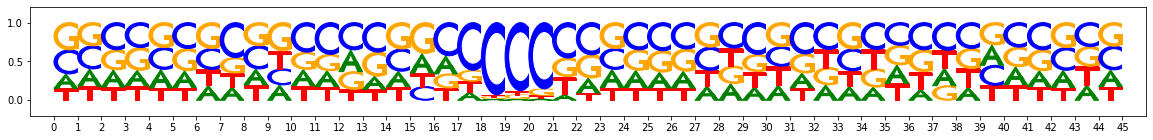

Hypothetical contributions


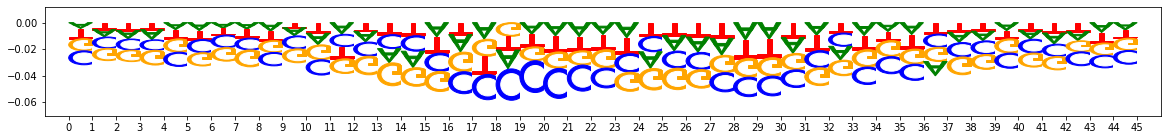

Contribution_scores


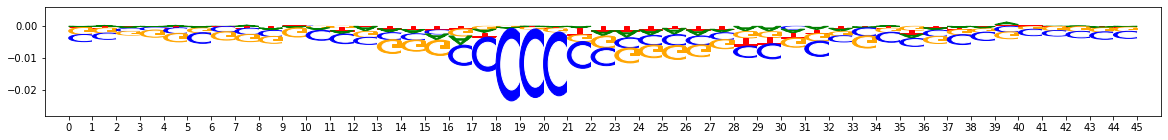

Pattern 13/18
--------------------------------------
161 seqlets
Sequence


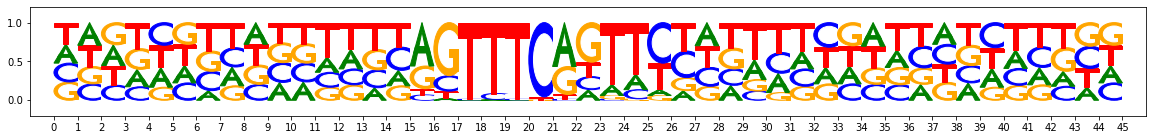

Hypothetical contributions


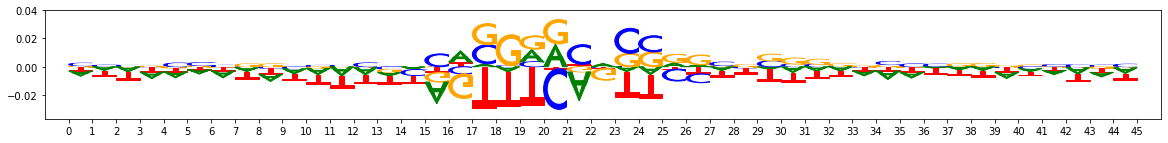

Contribution_scores


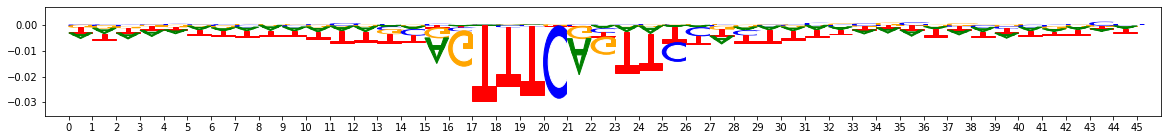

Pattern 14/18
--------------------------------------
158 seqlets
Sequence


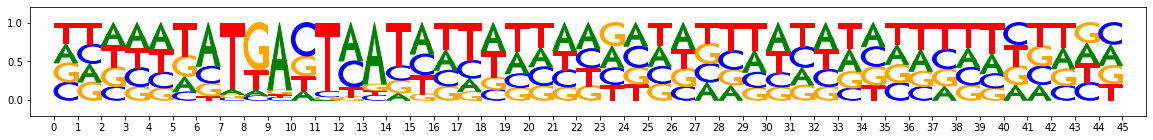

Hypothetical contributions


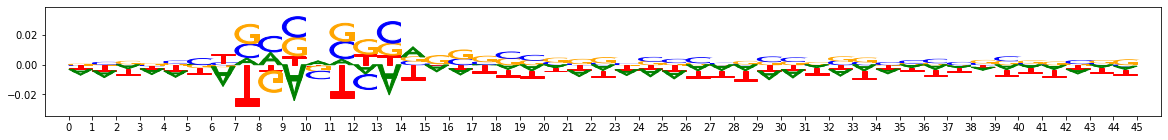

Contribution_scores


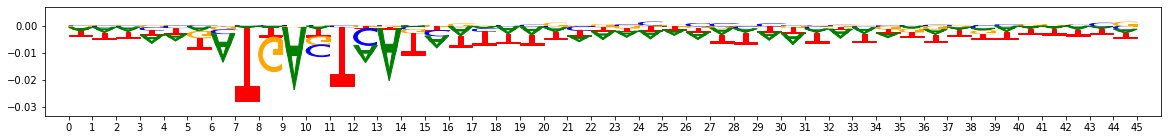

Pattern 15/18
--------------------------------------
141 seqlets
Sequence


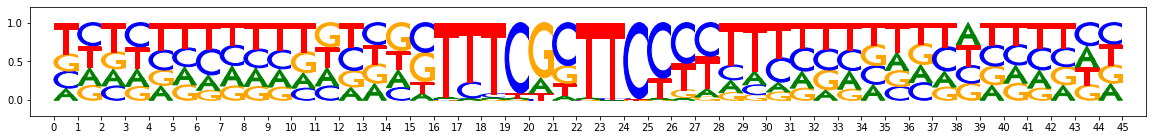

Hypothetical contributions


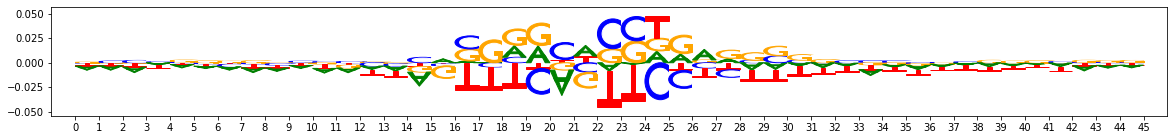

Contribution_scores


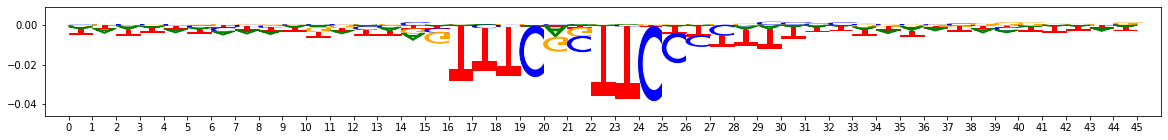

Pattern 16/18
--------------------------------------
140 seqlets
Sequence


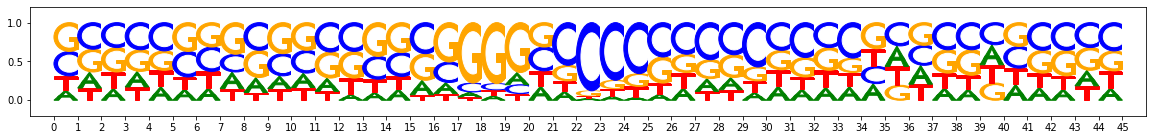

Hypothetical contributions


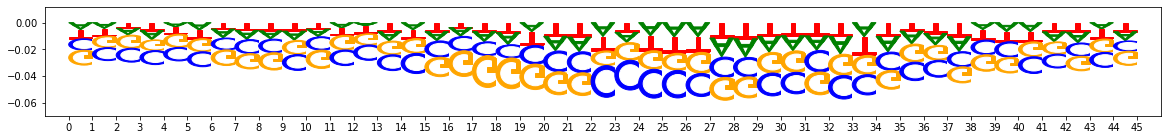

Contribution_scores


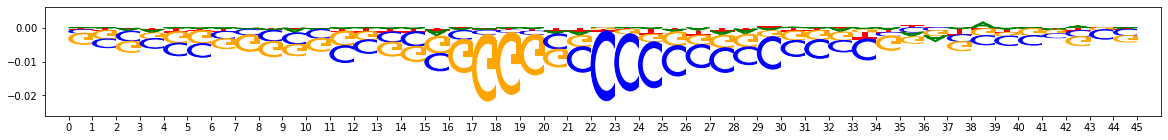

Pattern 17/18
--------------------------------------
85 seqlets
Sequence


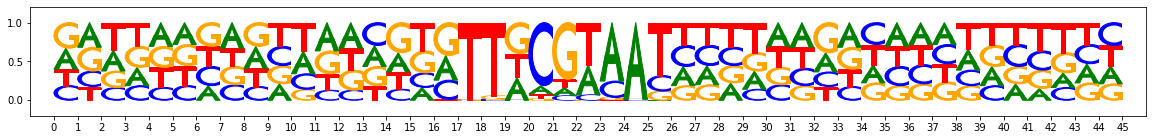

Hypothetical contributions


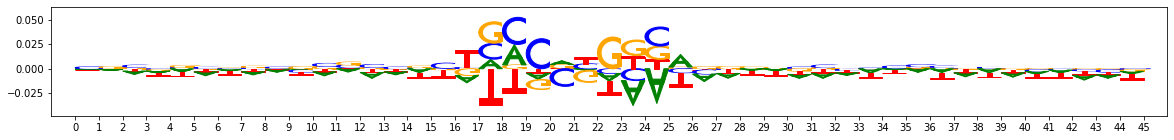

Contribution_scores


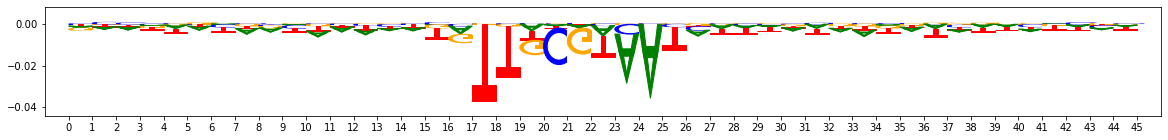

Pattern 18/18
--------------------------------------
88 seqlets
Sequence


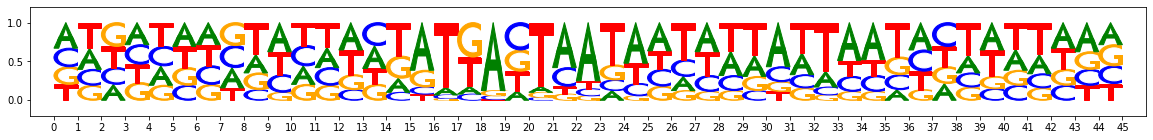

Hypothetical contributions


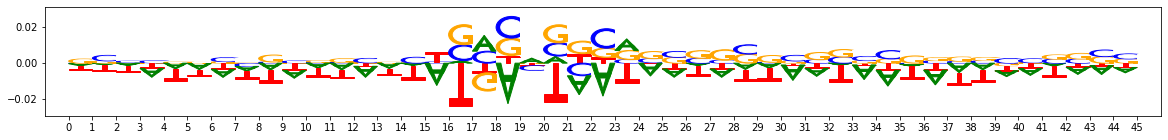

Contribution_scores


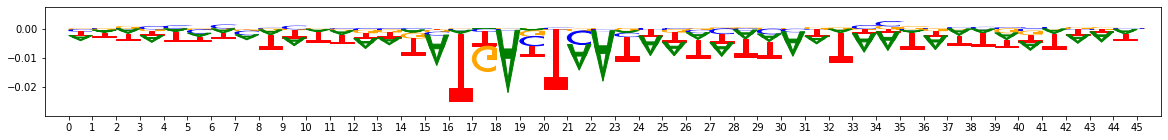

Metacluster 2/2
Pattern 1/11
--------------------------------------
1490 seqlets
Sequence


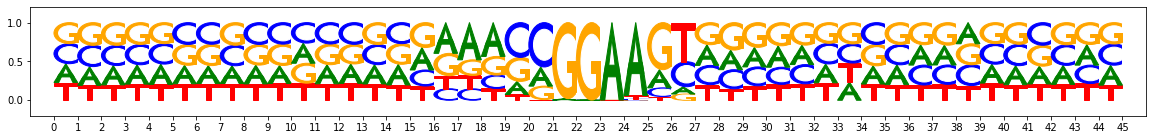

Hypothetical contributions


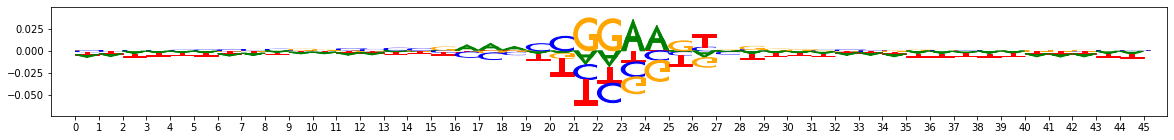

Contribution_scores


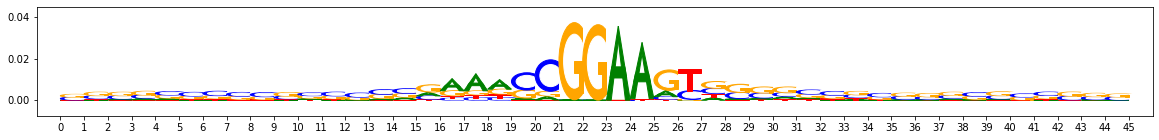

Pattern 2/11
--------------------------------------
1196 seqlets
Sequence


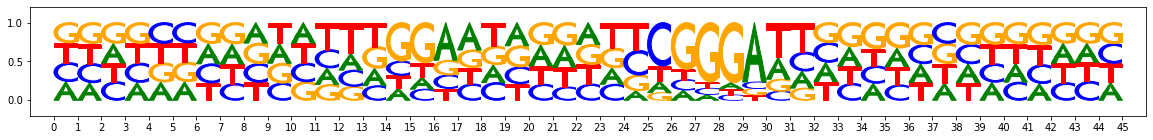

Hypothetical contributions


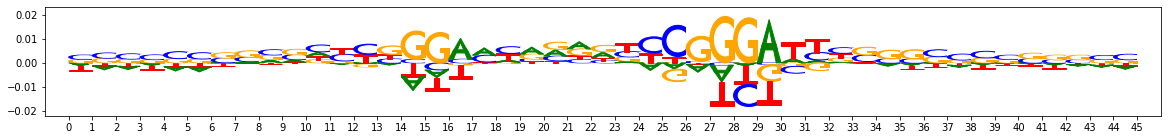

Contribution_scores


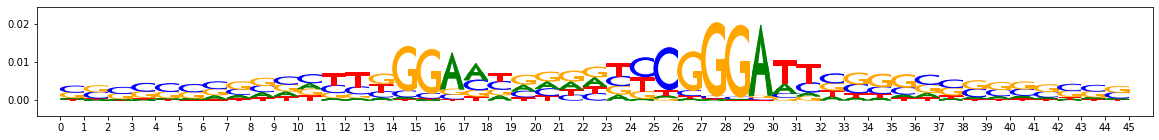

Pattern 3/11
--------------------------------------
1185 seqlets
Sequence


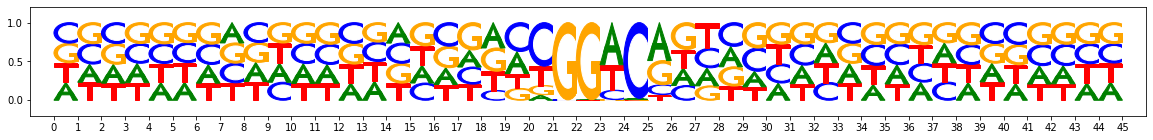

Hypothetical contributions


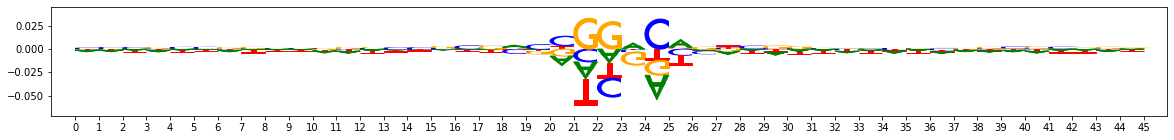

Contribution_scores


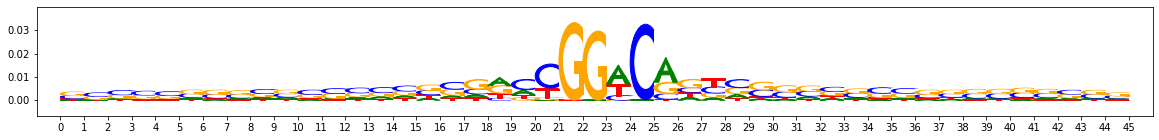

Pattern 4/11
--------------------------------------
532 seqlets
Sequence


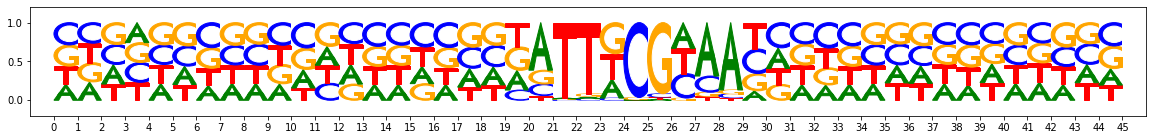

Hypothetical contributions


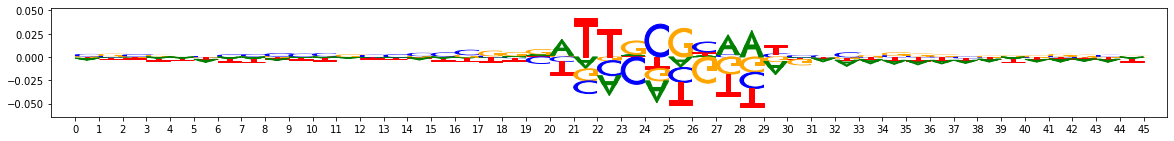

Contribution_scores


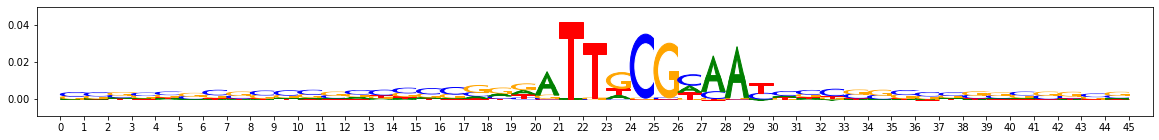

Pattern 5/11
--------------------------------------
458 seqlets
Sequence


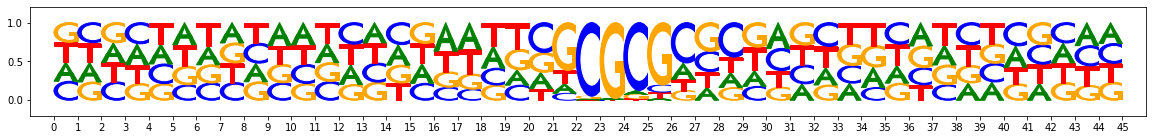

Hypothetical contributions


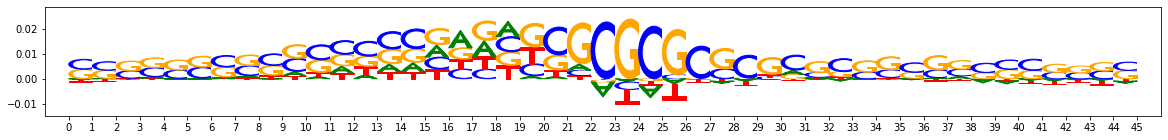

Contribution_scores


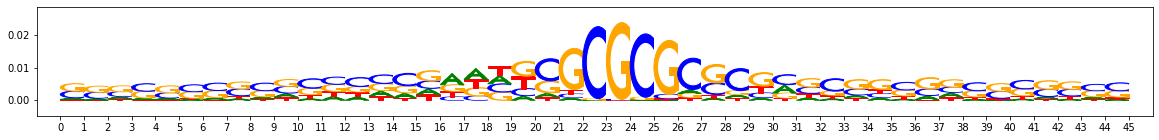

Pattern 6/11
--------------------------------------
361 seqlets
Sequence


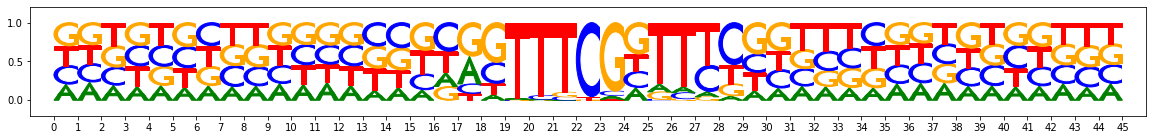

Hypothetical contributions


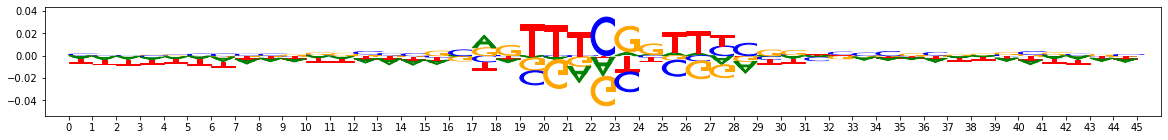

Contribution_scores


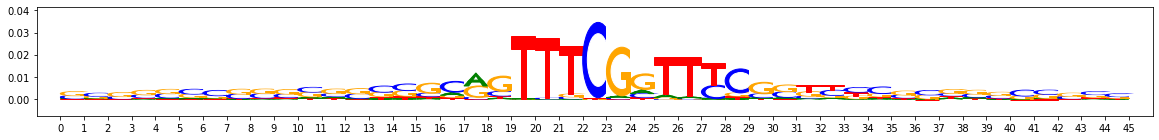

Pattern 7/11
--------------------------------------
352 seqlets
Sequence


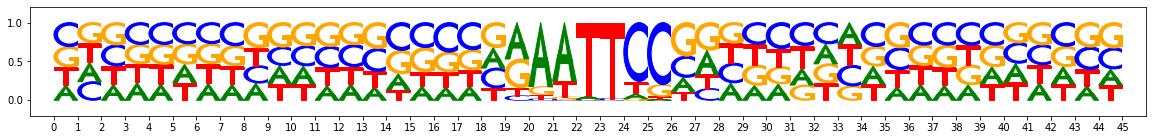

Hypothetical contributions


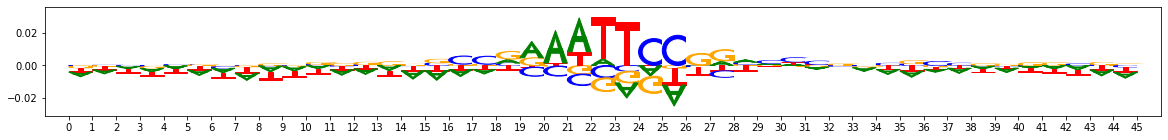

Contribution_scores


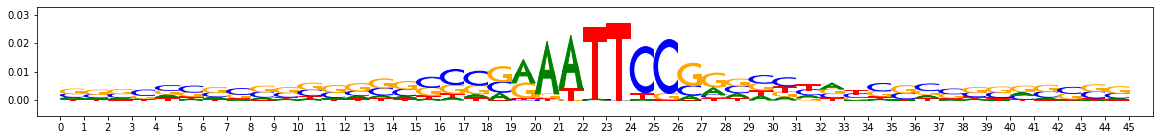

Pattern 8/11
--------------------------------------
263 seqlets
Sequence


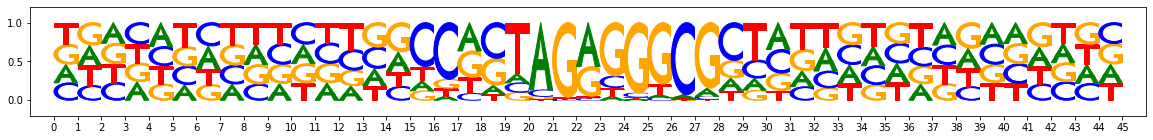

Hypothetical contributions


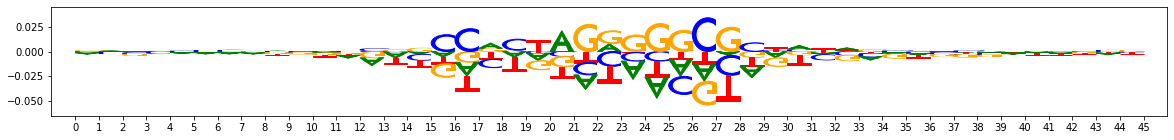

Contribution_scores


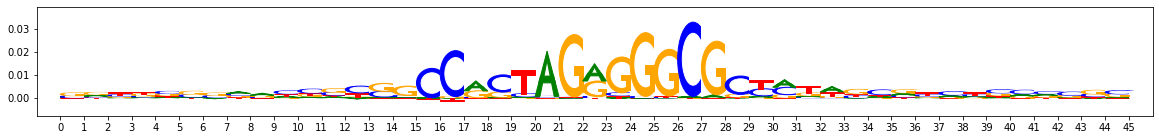

Pattern 9/11
--------------------------------------
157 seqlets
Sequence


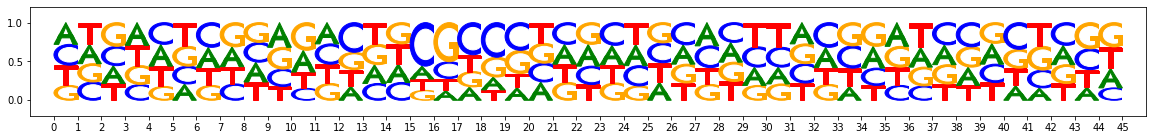

Hypothetical contributions


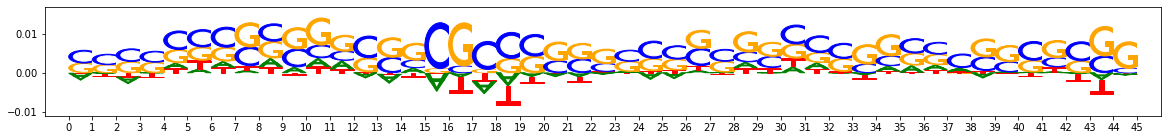

Contribution_scores


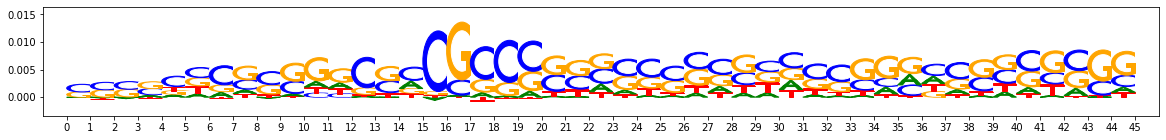

Pattern 10/11
--------------------------------------
163 seqlets
Sequence


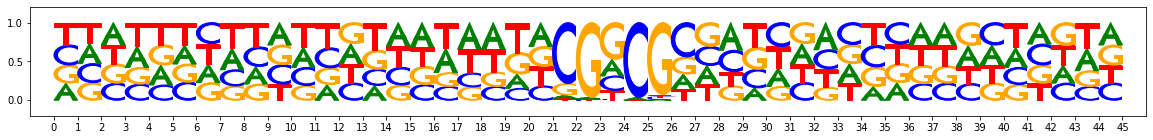

Hypothetical contributions


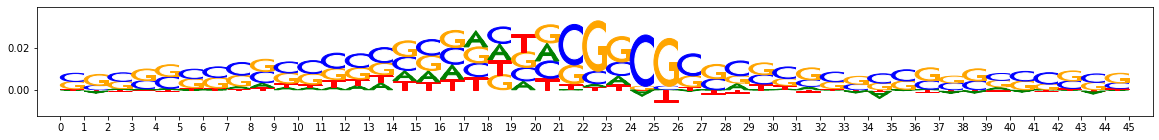

Contribution_scores


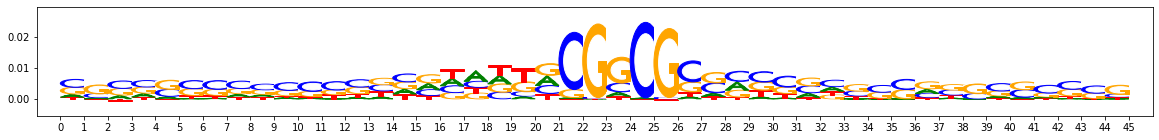

Pattern 11/11
--------------------------------------
83 seqlets
Sequence


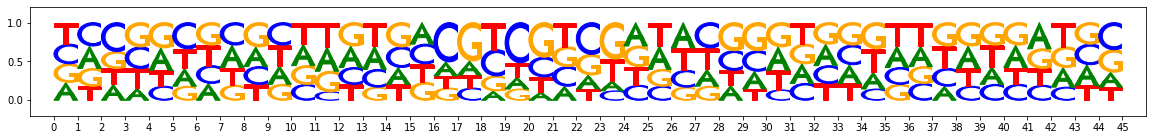

Hypothetical contributions


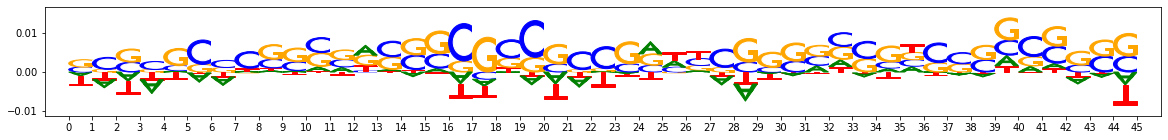

Contribution_scores


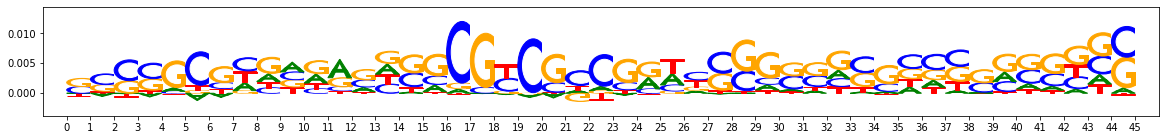

In [7]:
metaclusters = tfm_obj.metacluster_idx_to_submetacluster_results
num_metaclusters = len(metaclusters.keys())
for metacluster_i, metacluster_key in enumerate(metaclusters.keys()):
    metacluster = metaclusters[metacluster_key]
    print("Metacluster %d/%d" % (metacluster_i + 1, num_metaclusters))
    print("==========================================")
    patterns = metacluster.seqlets_to_patterns_result.patterns
    num_patterns = len(patterns)
    for pattern_i, pattern in enumerate(patterns):
        seqlets = pattern.seqlets
        print("Pattern %d/%d" % (pattern_i + 1, num_patterns))
        print("--------------------------------------")

        print("%d seqlets" % len(seqlets))
        print("Sequence")
        viz_sequence.plot_weights(pattern["sequence"].fwd)
        print("Hypothetical contributions")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].fwd)
        print("Contribution_scores")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"].fwd)